## Parte 1

### Importación de Librerías y Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

C:\Users\diego\AppData\Local\Temp\ipykernel_14512\1675529022.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Análisis Exploratorio de Datos (EDA)

In [2]:
# Visualizar las primeras filas del conjunto de datos para entender su estructura

data = pd.read_csv('shopping_behavior_updated.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [37]:
# Realizar estadísticas descriptivas para comprender las distribuciones y rangos de las variables

#Tablas de frecuencia

columnas_categoricas = [
    'Gender',
    'Item Purchased',
    'Category',
    'Location',
    'Size',
    'Color',
    'Season',
    'Subscription Status',
    'Shipping Type',
    'Discount Applied',
    'Promo Code Used',
    'Payment Method',
    'Frequency of Purchases'
]

# Iterar sobre la lista de columnas categóricas y mostrar sus tablas de frecuencia
for columna in columnas_categoricas:
    print(f"Tabla de frecuencia para {columna}:")
    print(data[columna].value_counts())
    print("\n")

Tabla de frecuencia para Gender:
Gender
Male      2652
Female    1248
Name: count, dtype: int64


Tabla de frecuencia para Item Purchased:
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64


Tabla de frecuencia para Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


Tabla de frecuencia para Location:
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Neva

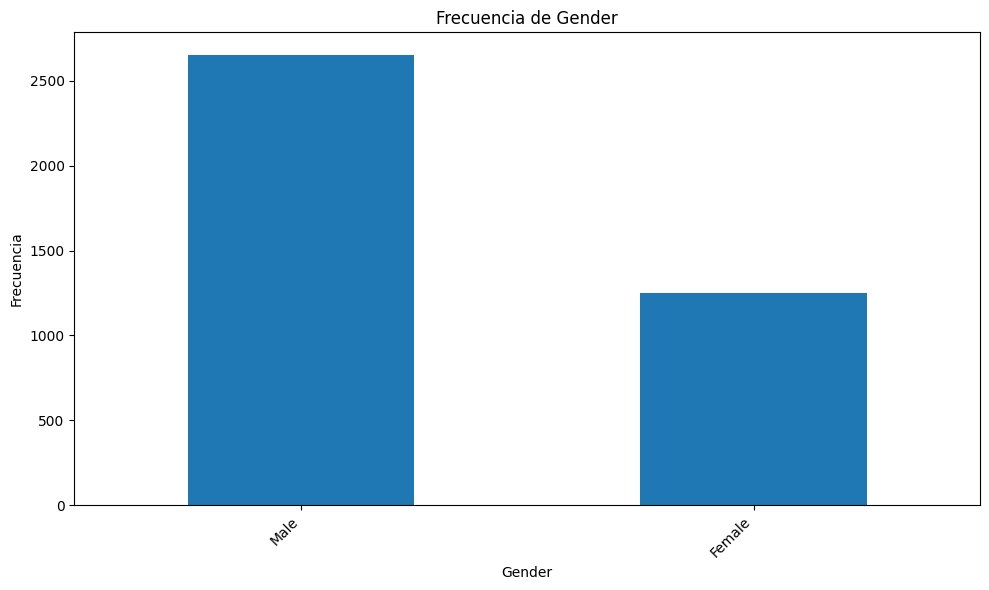

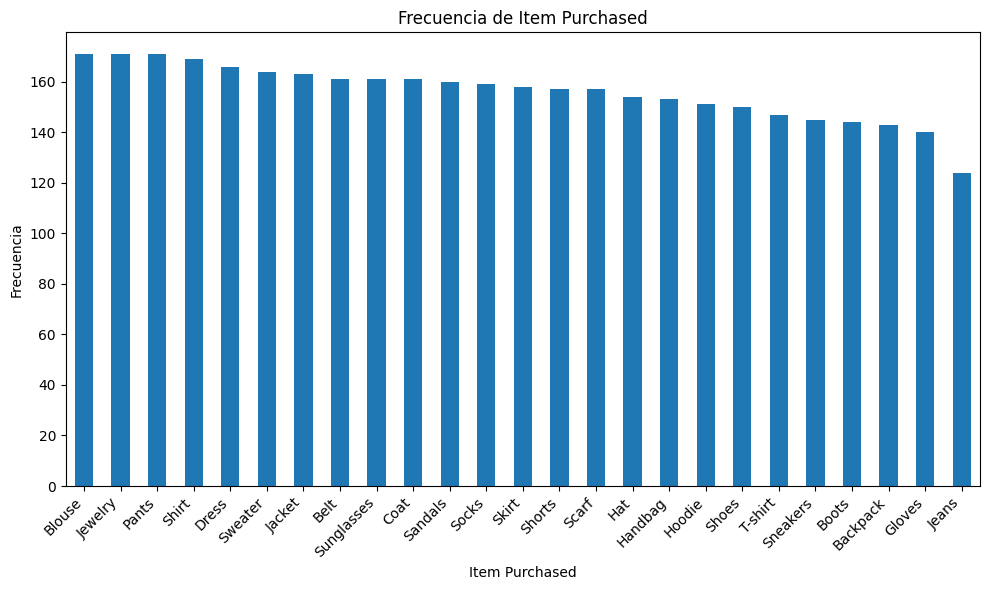

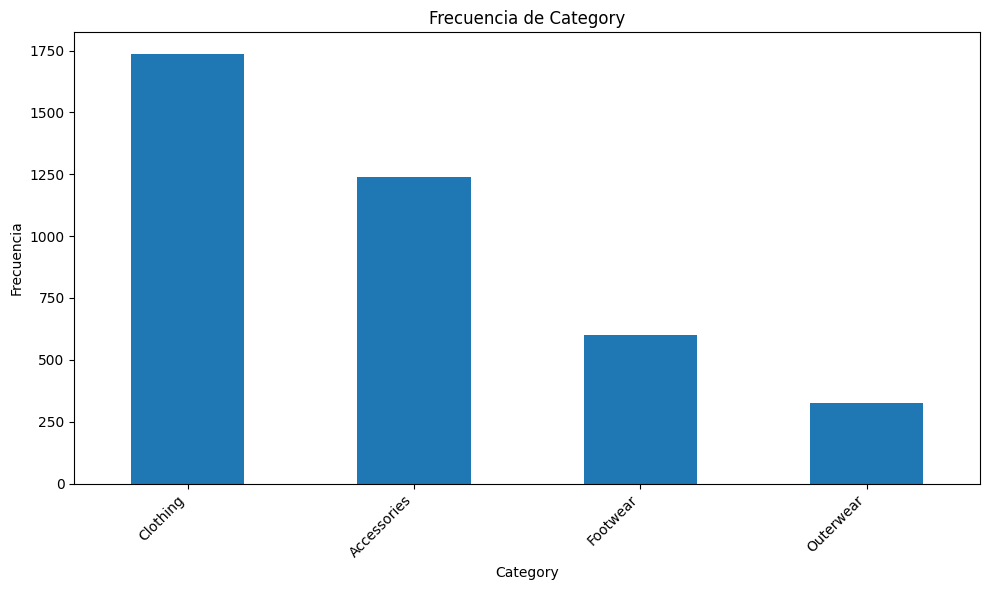

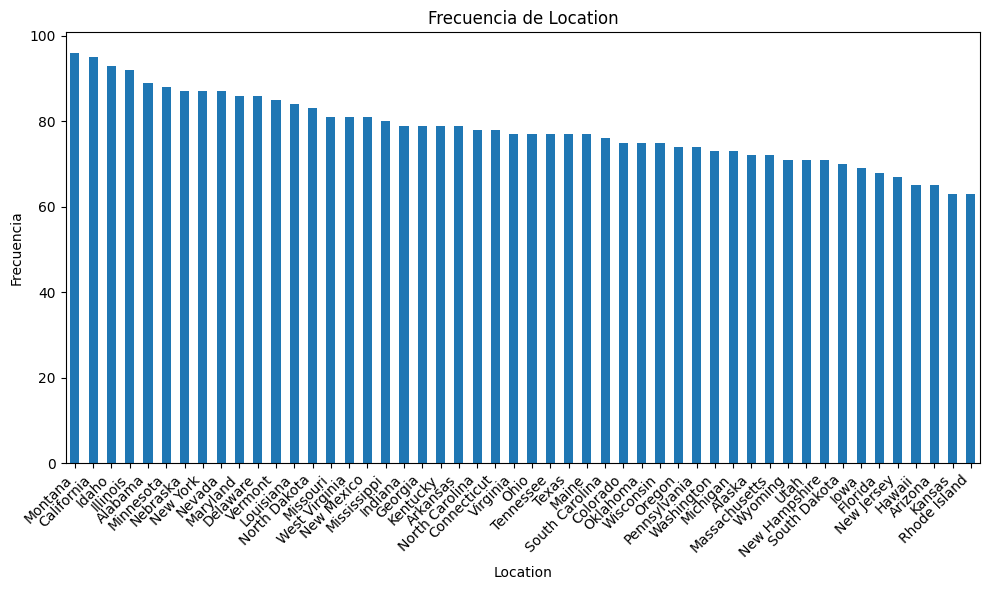

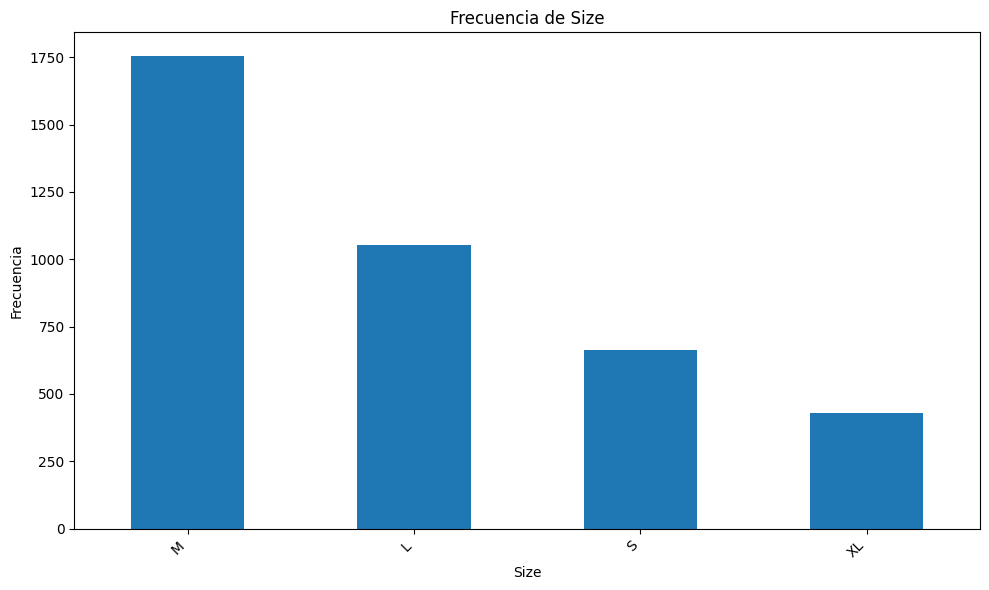

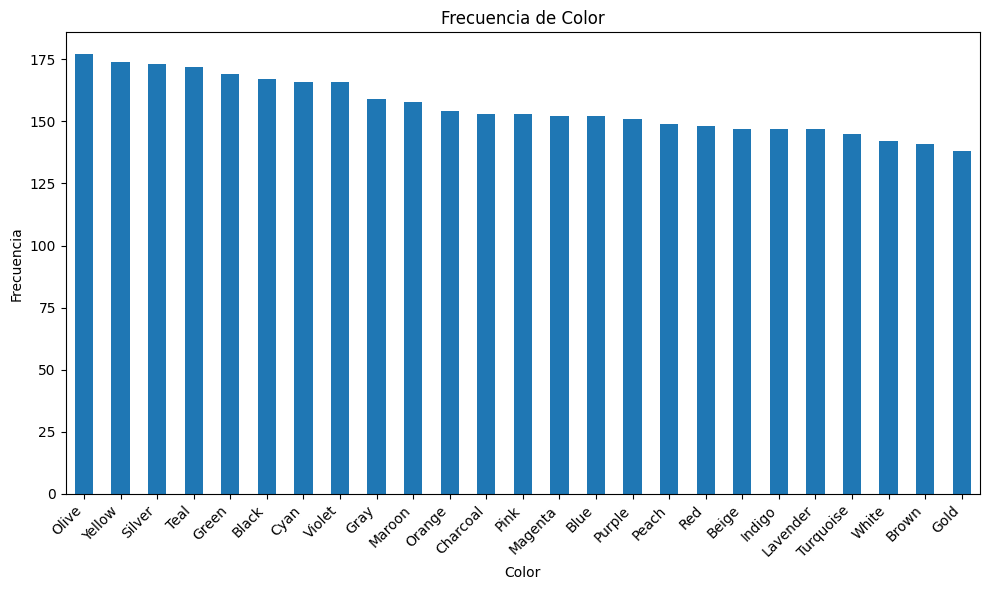

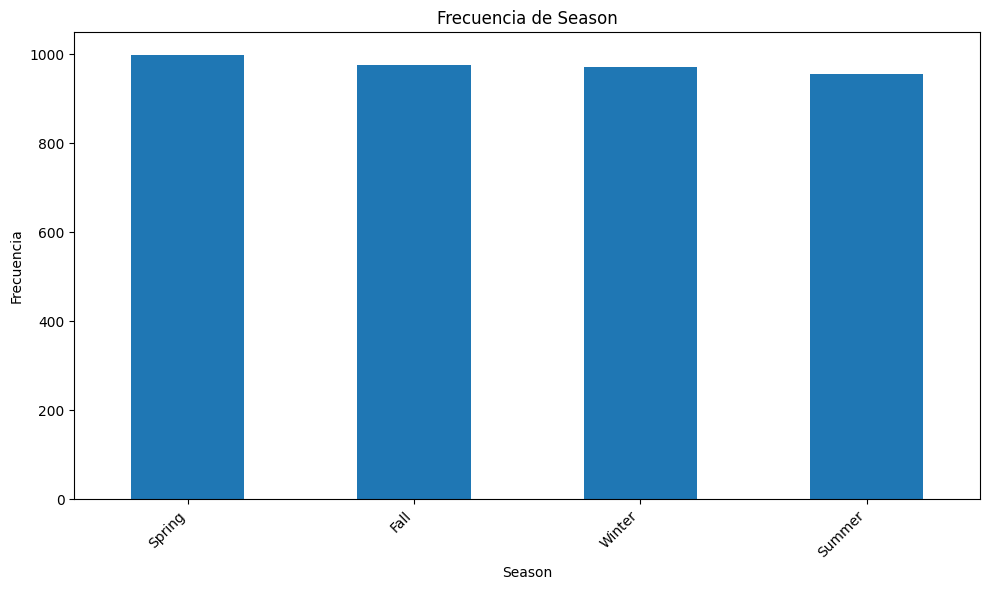

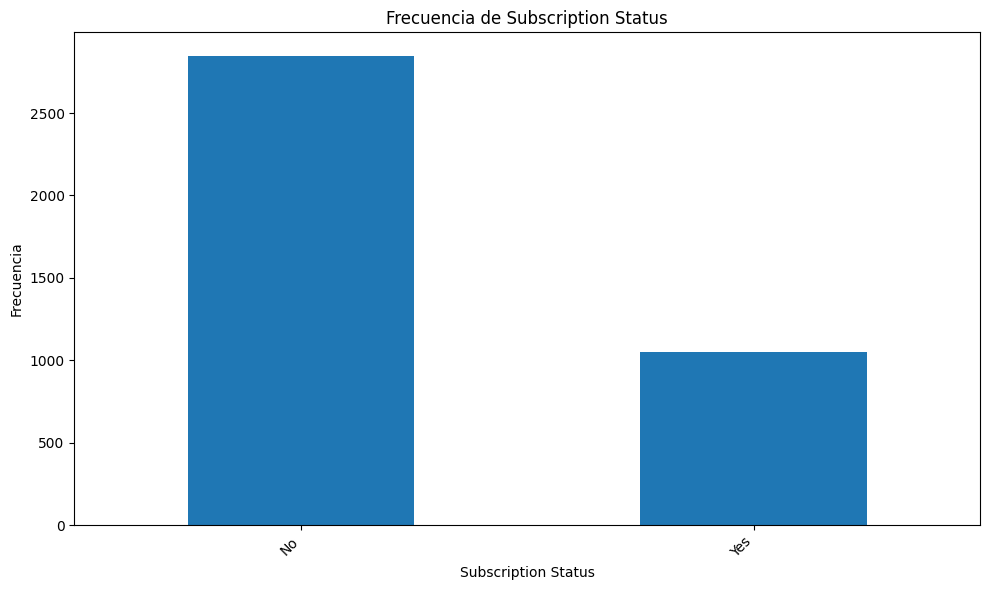

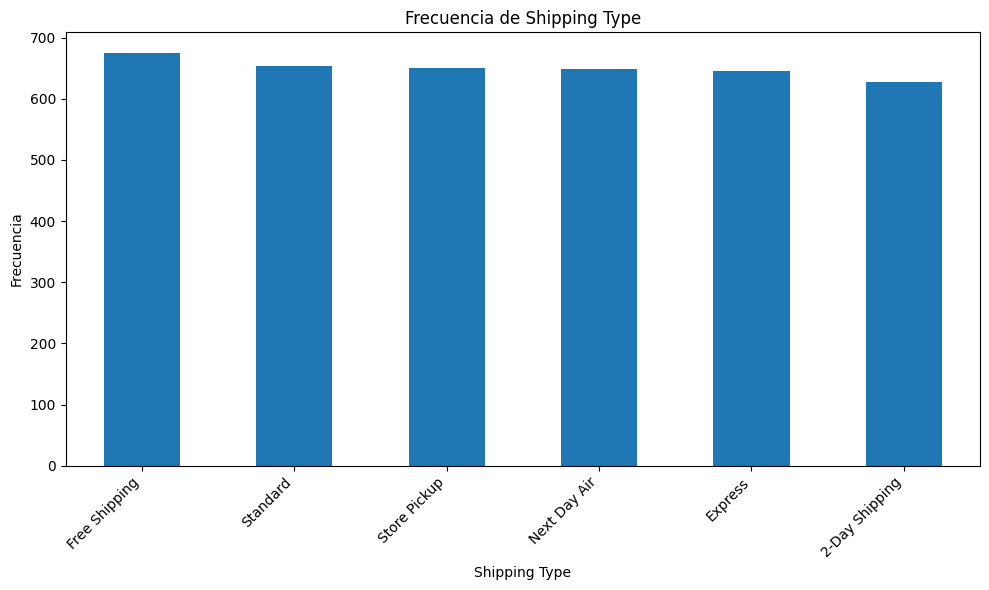

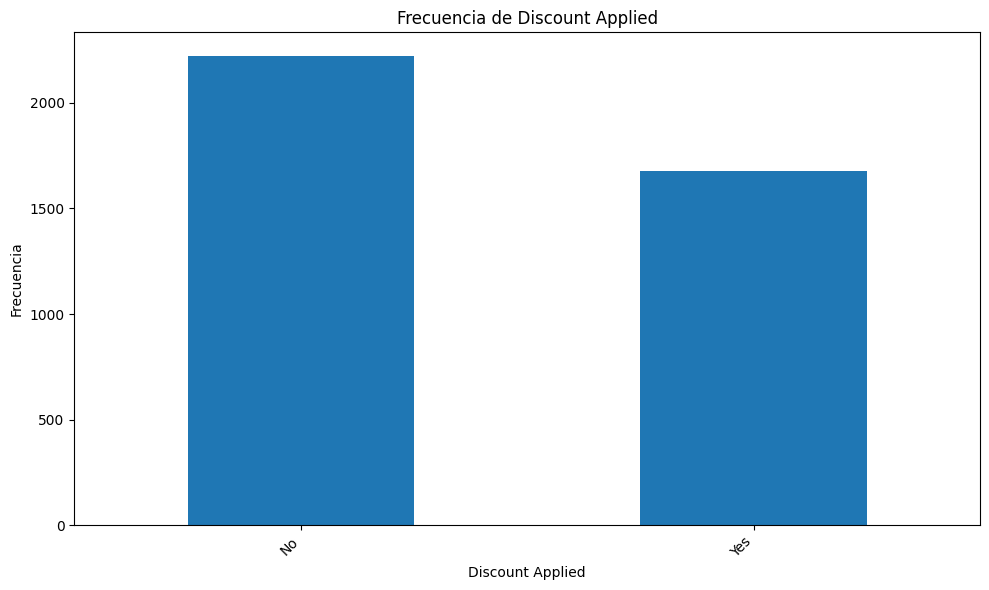

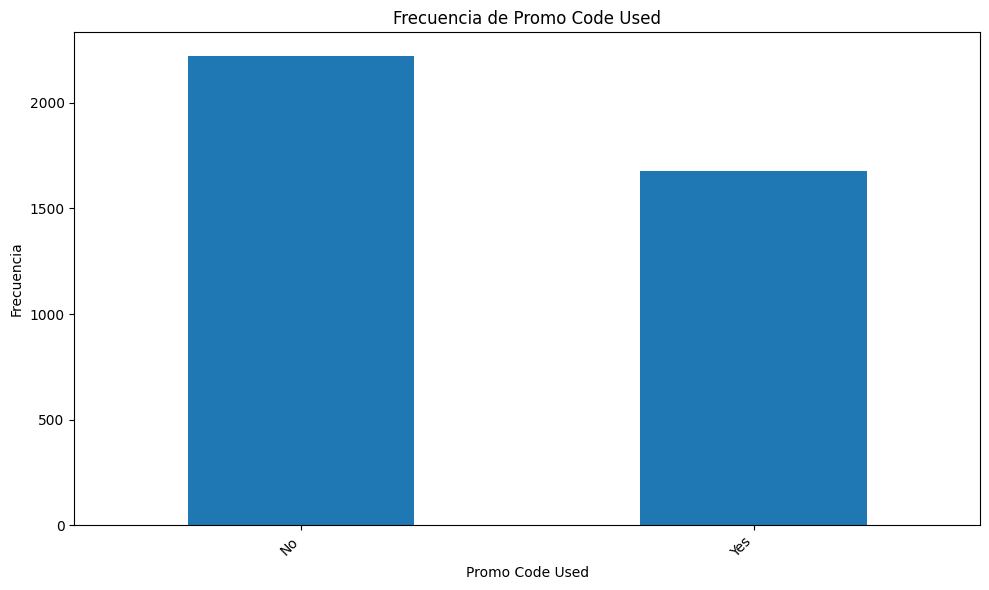

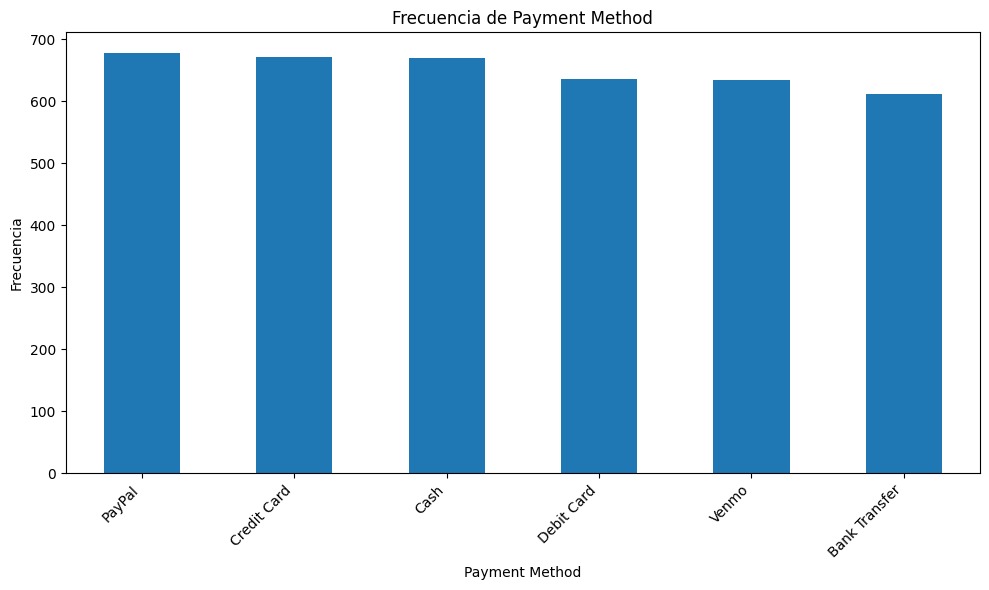

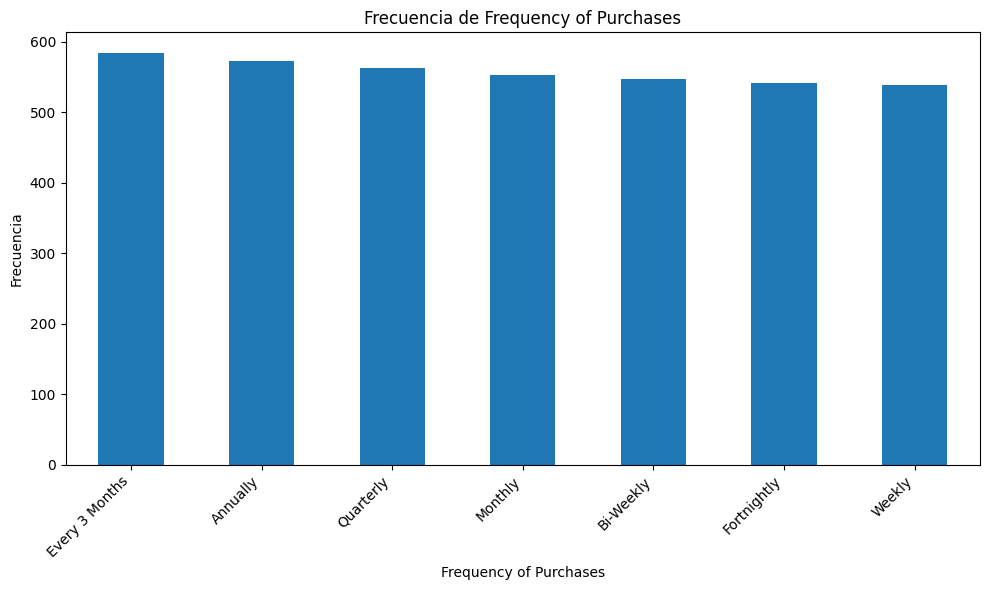

In [5]:

for columna in columnas_categoricas:
    # Conteo de frecuencias
    frecuencias = data[columna].value_counts()
    
    # Crear un gráfico de barras
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico como desees
    frecuencias.plot.bar()
    plt.title(f'Frecuencia de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha="right")  # Rota los nombres de las categorías para mejor lectura
    plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para que el subplot se ajuste al área del gráfico
    plt.show()


d:\ProgramData\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

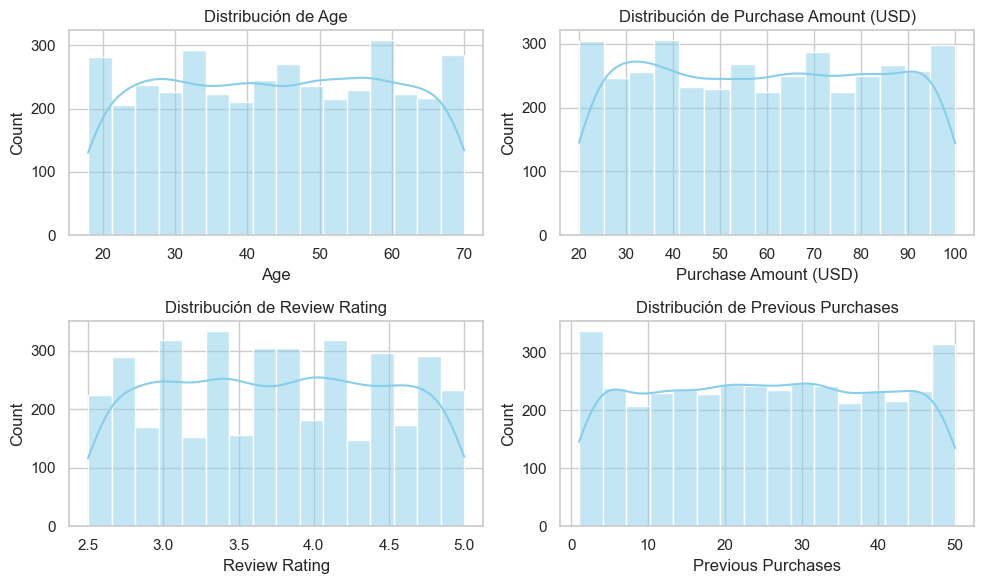

In [51]:
# Distribución de las variables cuantitativas

# Seleccionar solo las columnas numéricas
columnas_cuantitativas = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Configurar el estilo y los ajustes de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Iterar sobre las columnas numéricas y crear histogramas y gráficos de densidad
for i, columna in enumerate(columnas_cuantitativas):
    plt.subplot(2, 2, i + 1) 
    sns.histplot(data=data, x=columna, kde=True, color='skyblue')
    plt.title(f'Distribución de {columna}')

plt.tight_layout()
plt.show()

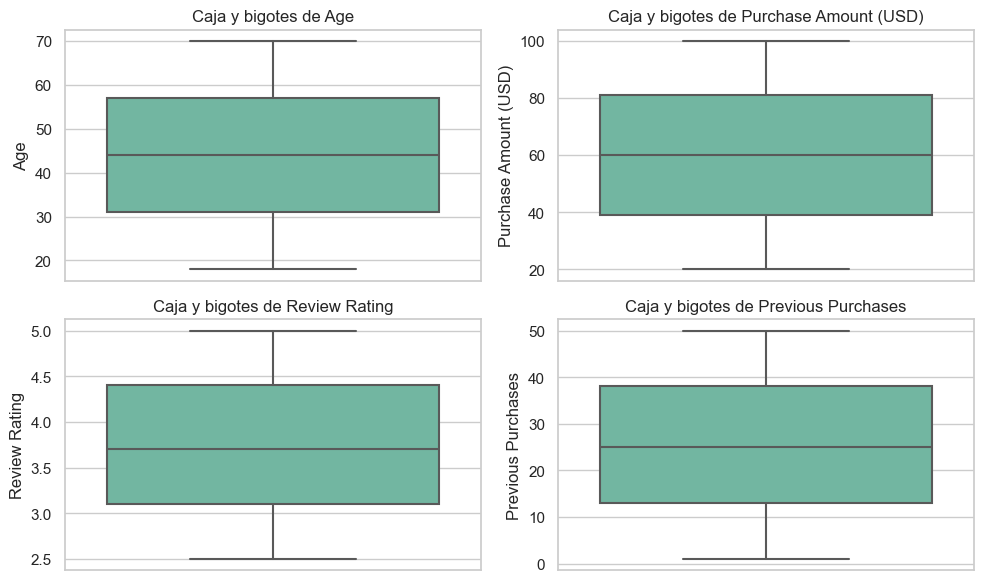

In [20]:
# Caja y bigotes de cada variable cuantitativa

# Configurar el estilo y los ajustes de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Iterar sobre las columnas numéricas y crear gráficos de caja y bigotes
for i, columna in enumerate(columnas_cuantitativas):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=data[columna], palette="Set2")
    plt.title(f'Caja y bigotes de {columna}')

plt.tight_layout()
plt.show()

In [3]:
# Identificar y manejar valores faltantes si los hay.

# Calcular el número de valores faltantes por columna
valores_faltantes = data.isnull().sum()

# Imprimir el número de valores faltantes por columna
print("Número de valores faltantes por columna:")
print(valores_faltantes)

Número de valores faltantes por columna:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [21]:
# Graficar distribuciones y relaciones entre variables importantes

# Matriz de correlación de Pearson entre variables cuantitativas

correlation_matrix = data.loc[:,['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].corr(method='pearson')
correlation_matrix

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


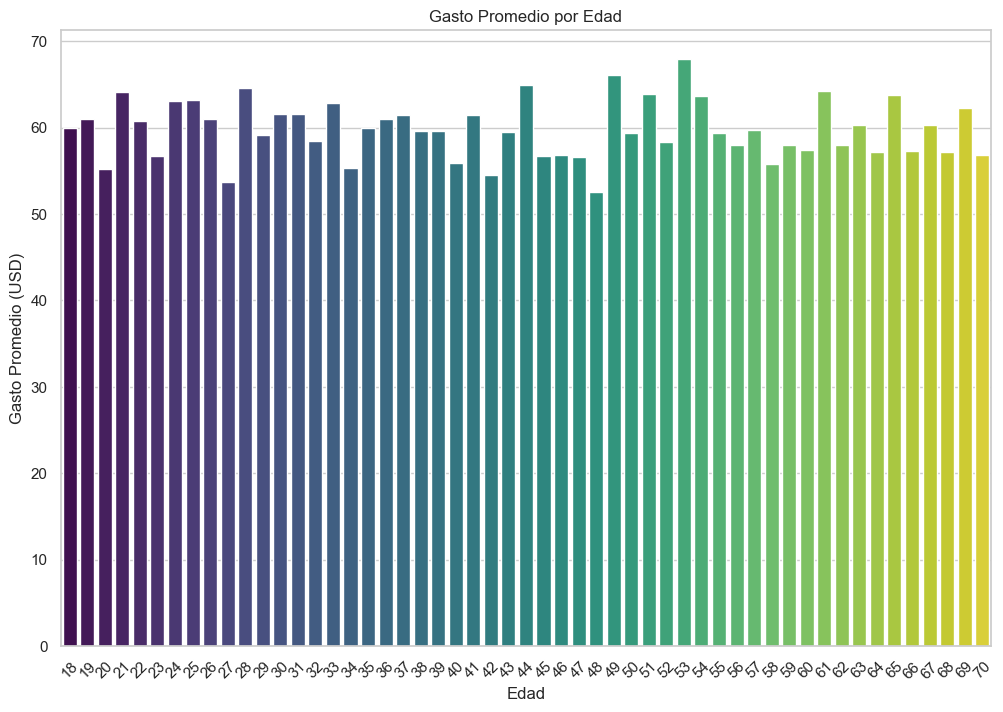

In [22]:
# Edades que más gastan en la tienda

# Agrupar por edad y calcular el gasto promedio por edad
gasto_promedio_por_edad = data.groupby('Age')['Purchase Amount (USD)'].mean().reset_index()

# Ordenar los resultados por gasto promedio de mayor a menor
gasto_promedio_por_edad = gasto_promedio_por_edad.sort_values('Purchase Amount (USD)', ascending=False)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras
sns.barplot(x='Age', y='Purchase Amount (USD)', data=gasto_promedio_por_edad, palette='viridis')

# Añadir títulos y etiquetas para hacer el gráfico más informativo
plt.title('Gasto Promedio por Edad')
plt.xlabel('Edad')
plt.ylabel('Gasto Promedio (USD)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad

plt.show()

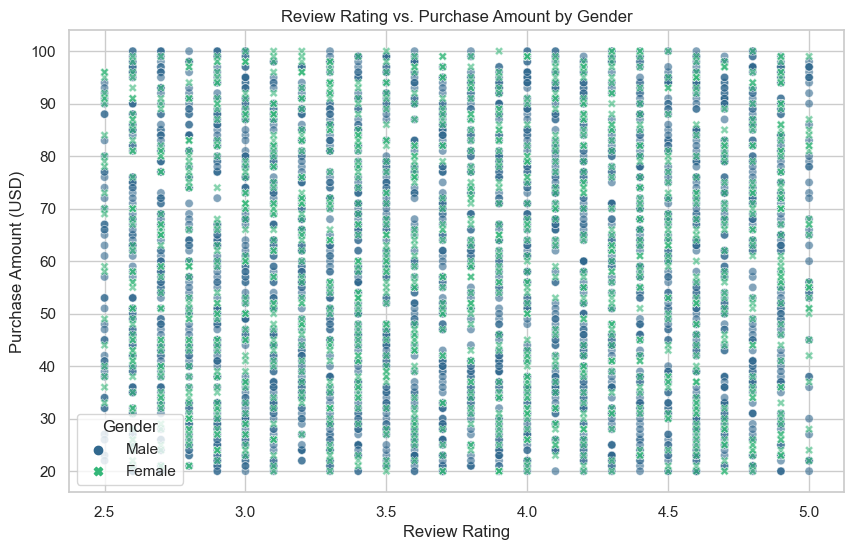

In [23]:
# Reseñas contra gastos en tienda, segmentado por género

# Asumiendo que 'df' es tu DataFrame
sns.set(style="whitegrid")  # Establecer estilo

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Review Rating", y="Purchase Amount (USD)", hue="Gender", style="Gender", alpha=0.6, palette="viridis")
plt.title('Review Rating vs. Purchase Amount by Gender')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')

plt.legend(title='Gender')
plt.show()


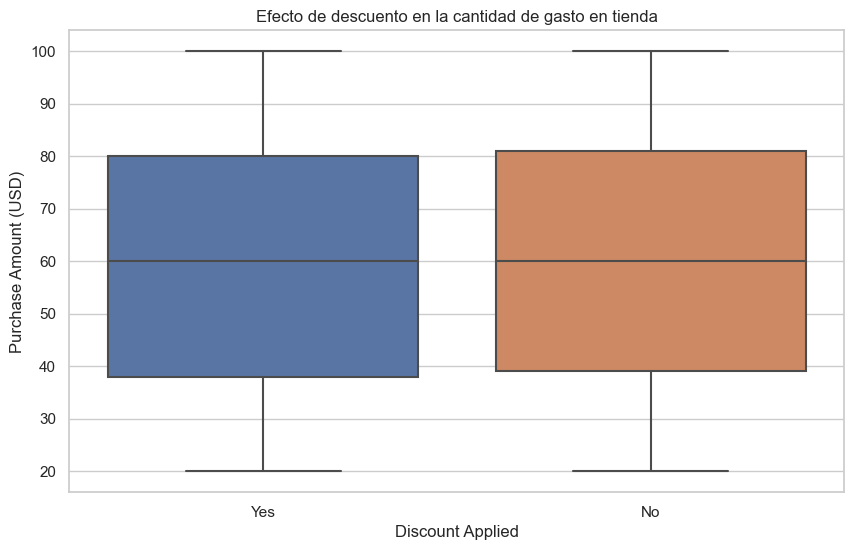

In [27]:
# Efecto de descuento en la cantidad de compras

plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=data)

plt.title('Efecto de descuento en la cantidad de gasto en tienda')
plt.xlabel('Discount Applied')
plt.ylabel('Purchase Amount (USD)')
plt.show()


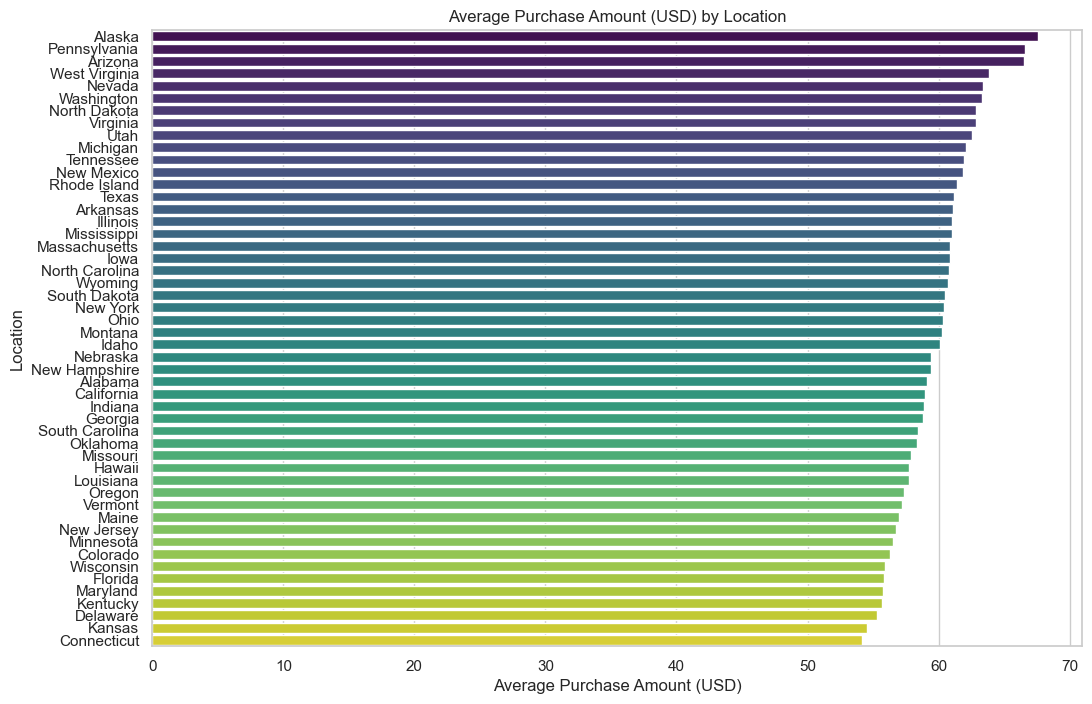

In [28]:
# Promedio de compras por ubicación

# Calcular el promedio del Purchase Amount por Location
avg_purchase_by_location = data.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

# Ordenar los resultados para mejor visualización
avg_purchase_by_location = avg_purchase_by_location.sort_values('Purchase Amount (USD)', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Purchase Amount (USD)', y='Location', data=avg_purchase_by_location, palette='viridis')

plt.title('Average Purchase Amount (USD) by Location')
plt.xlabel('Average Purchase Amount (USD)')
plt.ylabel('Location')
plt.show()


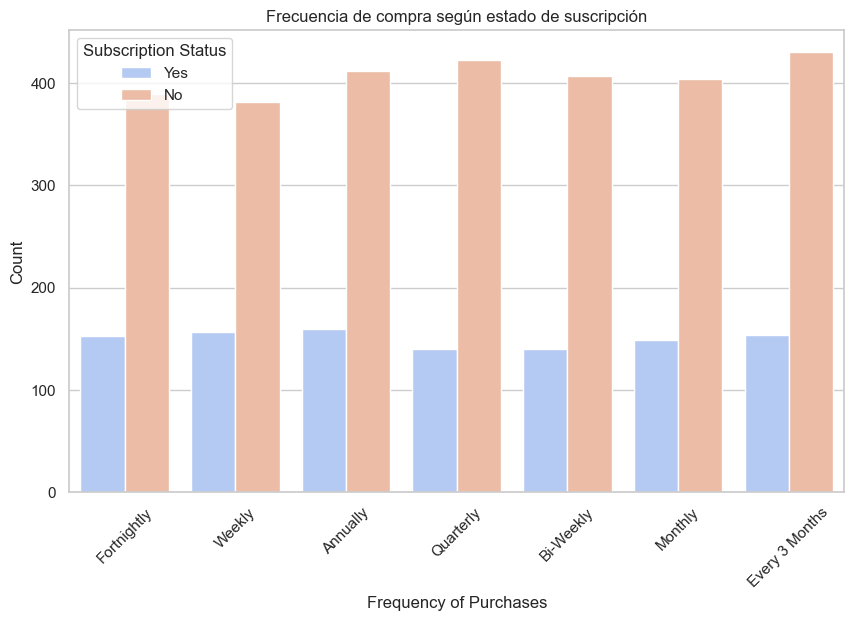

In [31]:
# Frecuencia de compras según el estado de suscripción (Impacto en la lealtad de los clientes)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Gráfico de barras de conteo
sns.countplot(x='Frequency of Purchases', hue='Subscription Status', data=data, palette='coolwarm')

plt.title('Frecuencia de compra según estado de suscripción')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rota los nombres de las categorías si son demasiado largos o si se superponen
plt.legend(title='Subscription Status')
plt.show()

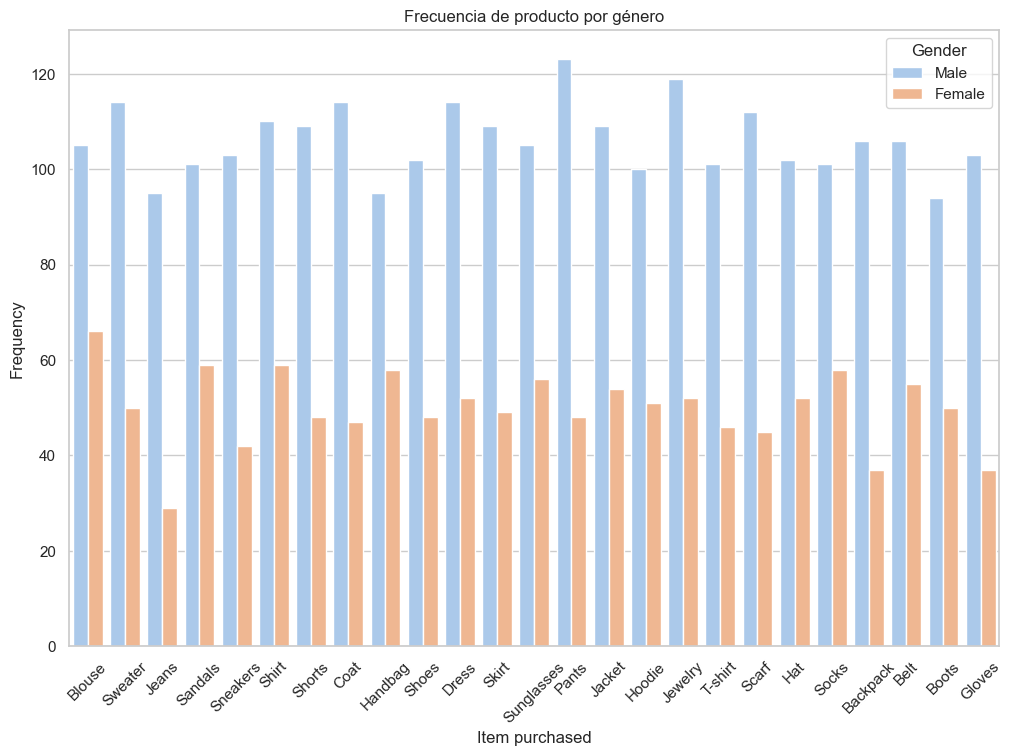

In [39]:
# Producto comprado por género

plt.figure(figsize=(12, 8))

# Gráfico de barras de conteo con 'Item purchased' en el eje x y separa por 'Gender'
sns.countplot(x='Item Purchased', hue='Gender', data=data, palette='pastel')

plt.title('Frecuencia de producto por género')
plt.xlabel('Item purchased')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 

# Muestra la leyenda
plt.legend(title='Gender')


plt.show()

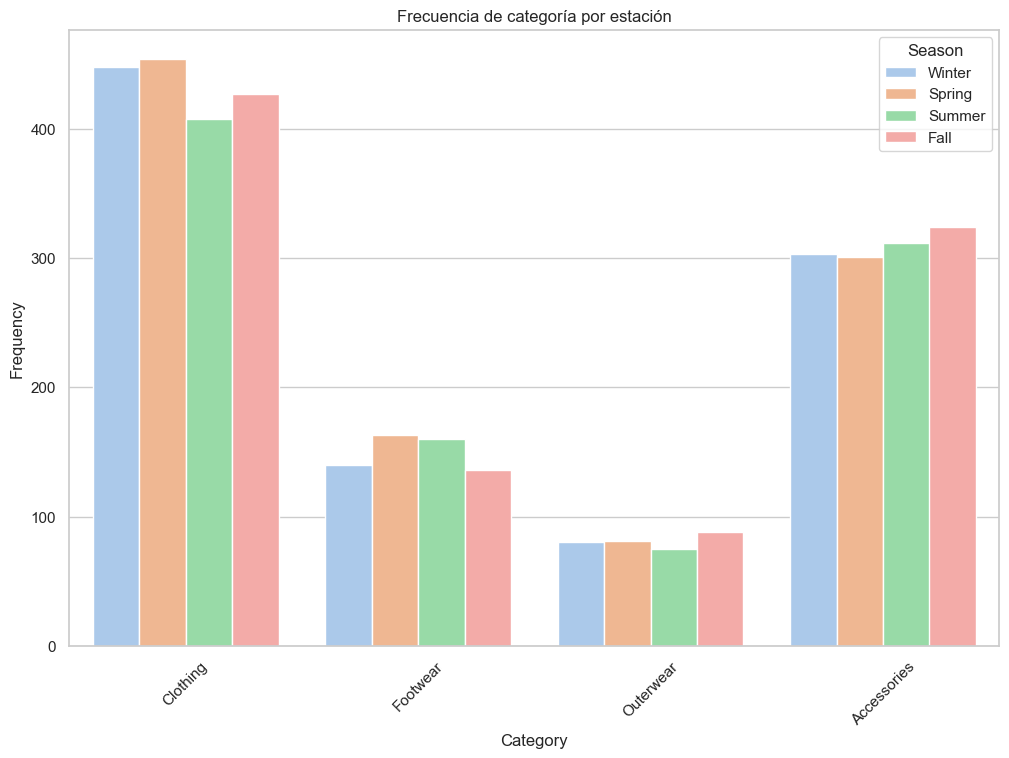

In [42]:
# Categoría de producto comprado por estación

plt.figure(figsize=(12, 8))

# Gráfico de barras de conteo con 'Item purchased' en el eje x y separa por 'Season'
sns.countplot(x='Category', hue='Season', data=data, palette='pastel')

plt.title('Frecuencia de categoría por estación')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 

# Muestra la leyenda
plt.legend(title='Season')


plt.show()

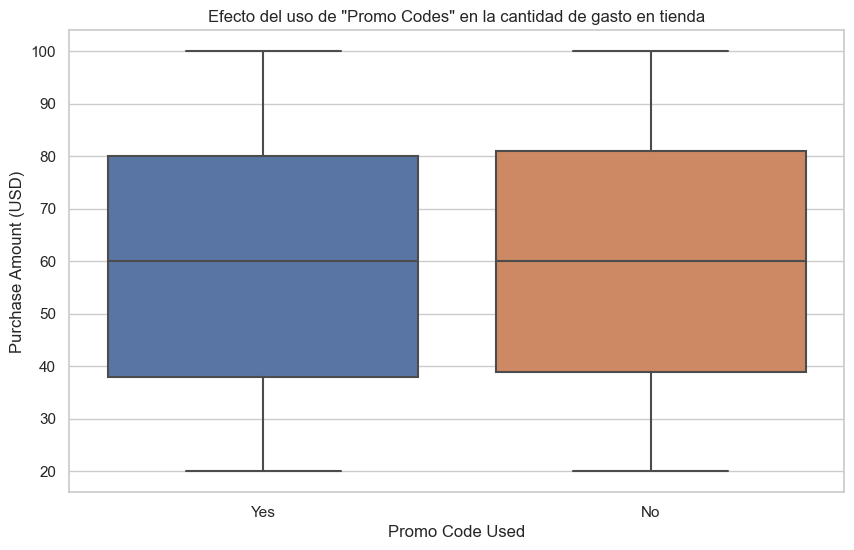

In [44]:
# Efecto de 'promo codes' en la cantidad de compras

plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo Code Used', y='Purchase Amount (USD)', data=data)

plt.title('Efecto del uso de "Promo Codes" en la cantidad de gasto en tienda')
plt.xlabel('Promo Code Used')
plt.ylabel('Purchase Amount (USD)')
plt.show()

## Parte 2

### Limpieza de datos

In [3]:
# Manejar valores faltantes, ya sea eliminándolos o imputándolos

# No hay datos faltantes

# Codificar variables categóricas utilizando técnicas como One-Hot Encoding

x = data.iloc[:, 1:].values

cat_cols = [1,2,3,5,6,7,8,10,11,12,13,15,16]
num_cols = len(x[0])

for col_index in cat_cols:
  
  transfCol = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [col_index - num_cols] )], remainder='passthrough')
  x = np.array(transfCol.fit_transform(x))
  
x[0]

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
       0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 55, 53, 3.1, 14],
      dtype=object)

In [5]:
# Aplicar normalización o estandarización a las características numéricas para garantizar que todas están en la misma escala

normalizador = StandardScaler()
x_normalized = normalizador.fit_transform(x)
x_normalized[0]

array([-0.4145781 , -0.40390282, -0.41966153,  2.48909059, -0.40647581,
       -0.4107486 , -0.40046091, -0.43142947, -0.45544521, -0.45585554,
       -0.4414215 , -0.45831512,  2.26967389, -1.15133896,  1.15133896,
       -1.15133896,  1.15133896, -0.4376841 ,  2.24435998, -0.45749571,
       -0.44638772, -0.44886384, -0.4472136 , -1.64429429,  1.64429429,
       -0.57735027, -0.58682537, -0.56945451,  1.73680104, -0.19791075,
       -0.21150919, -0.20138263, -0.19367492, -0.20207094, -0.21084674,
       -0.19152706,  4.8505981 , -0.21282896, -0.19791075, -0.19791075,
       -0.20138263, -0.20548336, -0.21804198, -0.20275729, -0.19930565,
       -0.20207094, -0.20069232, -0.19860924, -0.21544844, -0.21479604,
       -0.19650745, -0.21084674, -0.19438636, -0.21609922,  1.64429429,
       -0.90453403, -0.45256964, -0.35156152, -0.15281836, -0.1371451 ,
       -0.13018891, -0.14378879, -0.15800996, -0.14002801, -0.14285714,
       -0.1501616 , -0.1332115 , -0.14378879, -0.13018891, -0.15

## Parte 3

### Aplicación Inicial de K-Means

In [93]:
# Aplicar el algoritmo K-Means con un número arbitrario de clústeres (por ejemplo, 3) para tener una primera vista

datos_originales = data
kmeans = KMeans(3)
clusters_identificados = kmeans.fit_predict(x_normalized)

datos_originales['Cluster'] = clusters_identificados
datos_originales

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,2
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,2
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,2
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,2
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,0
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,0
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,0
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,0


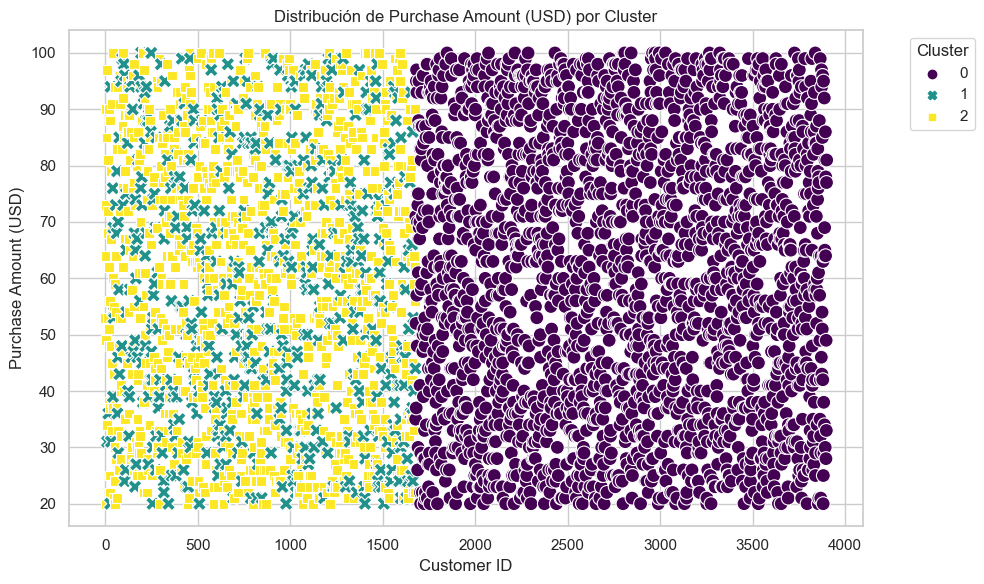

In [94]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de dispersión usando seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos_originales, x='Customer ID', y='Purchase Amount (USD)', hue='Cluster', palette='viridis', style='Cluster', s=100)

plt.title('Distribución de Purchase Amount (USD) por Cluster')
plt.xlabel('Customer ID')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Método del codo

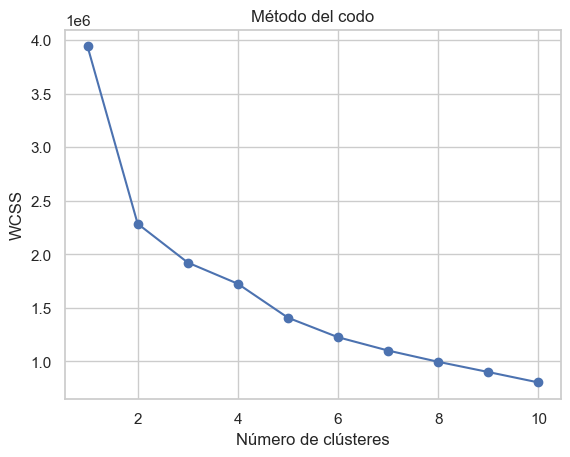

In [42]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.show()

Según el método del codo, el número óptimo de clusters es 2.

### Método de la silueta

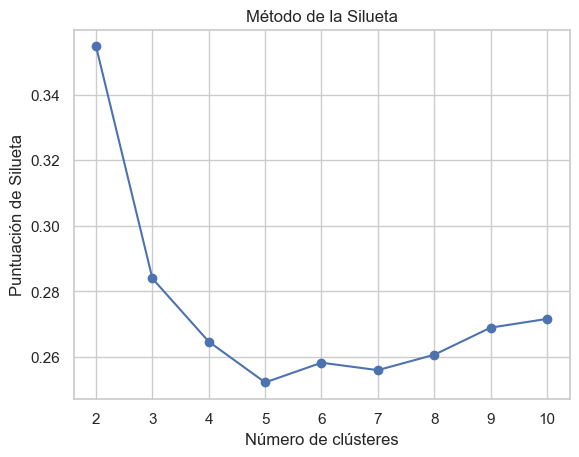

In [18]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

# Probar diferentes valores de K
for k in range(2, 11):
    # Ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x)
    
    # Calcular las puntuaciones de silueta
    silhouette_avg = silhouette_score(x, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Graficar las puntuaciones de silueta
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de clústeres')
plt.ylabel('Puntuación de Silueta')
plt.show()

El número con el mayor puntaje de silueta es 2. Por lo que el número óptimo de clusters es 2.

### K-Means con número óptimo de clusters (k=2)

In [46]:
# Aplicar el algoritmo K-Means con número óptimo de clusters (k=5)

datos_originales = data
kmeans = KMeans(2)
clusters_identificados = kmeans.fit_predict(x_normalized)

datos_originales['Cluster'] = clusters_identificados
datos_originales

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Cluster
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,0
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,0
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,0
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,0


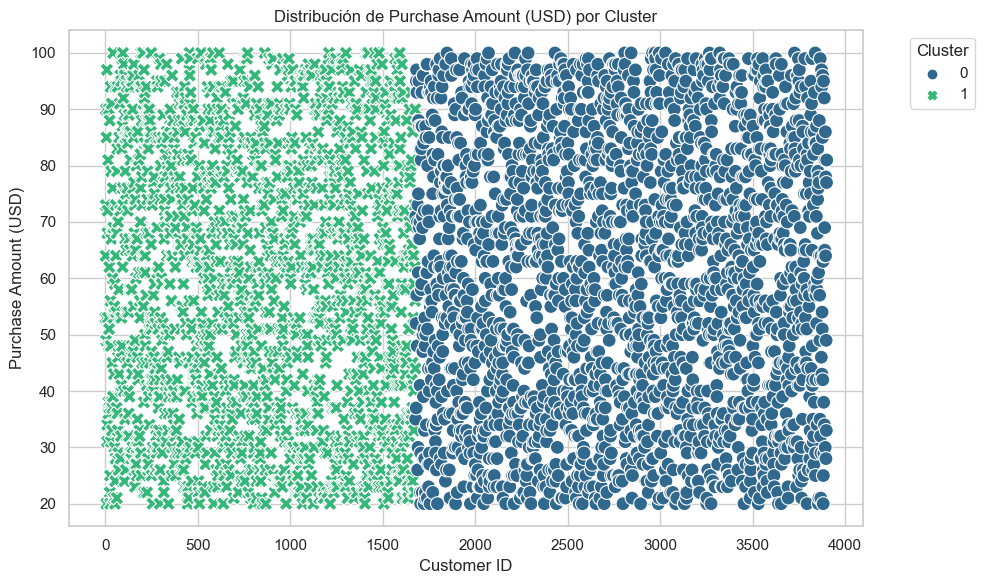

In [20]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de dispersión usando seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos_originales, x='Customer ID', y='Purchase Amount (USD)', hue='Cluster', palette='viridis', style='Cluster', s=100)

plt.title('Distribución de Purchase Amount (USD) por Cluster')
plt.xlabel('Customer ID')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Transformar datos a 2 dimensiones

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

escalador = StandardScaler()
escalador.fit(x)
datos_escalados = escalador.transform(x)

pca = PCA(n_components=2)
pca.fit(datos_escalados)
x_pca = pca.transform(datos_escalados)
x_pca

array([[ 3.18501166, -1.48860681],
       [ 3.22267564, -2.12253122],
       [ 3.35560172, -2.04671975],
       ...,
       [-2.58795671,  2.05203371],
       [-2.54991632,  0.7284891 ],
       [-2.54812493,  2.0362892 ]])

In [47]:
# Concatenar clusters
x_pca_clusters = np.hstack((x_pca, clusters_identificados.reshape(-1, 1)))
x_pca_clusters

array([[ 3.18501166, -1.48860681,  1.        ],
       [ 3.22267564, -2.12253122,  1.        ],
       [ 3.35560172, -2.04671975,  1.        ],
       ...,
       [-2.58795671,  2.05203371,  0.        ],
       [-2.54991632,  0.7284891 ,  0.        ],
       [-2.54812493,  2.0362892 ,  0.        ]])

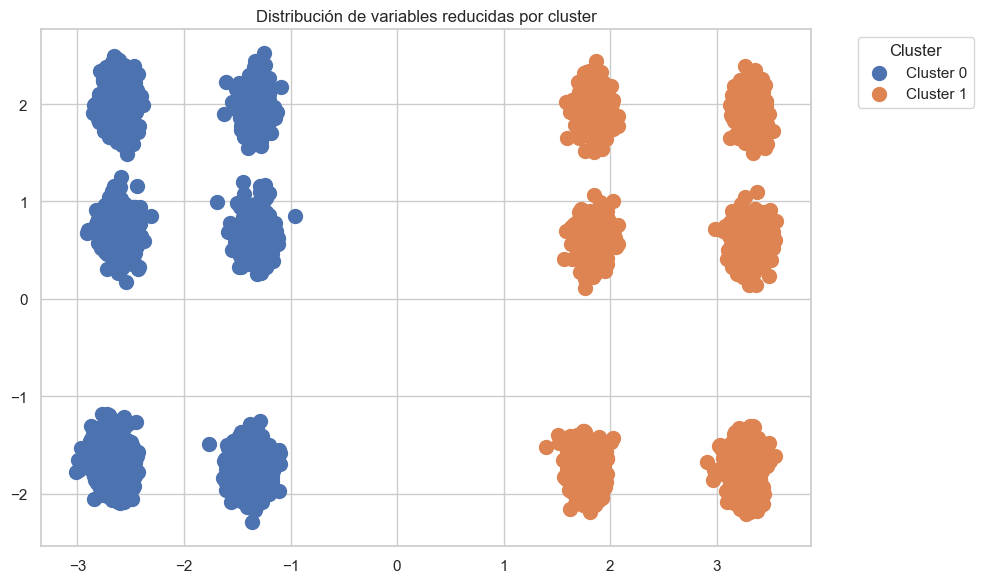

In [48]:
x_axis = x_pca_clusters[:, 0]
y_axis = x_pca_clusters[:, 1]
clusters = x_pca_clusters[:, 2]

# Configurar el estilo de seaborn


# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
for cluster_id in np.unique(clusters):
    mask = (clusters == cluster_id)
    plt.scatter(x_axis[mask], y_axis[mask], label=f'Cluster {int(cluster_id)}', s=100)

plt.title('Distribución de variables reducidas por cluster')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Análisis estadístico por cluster


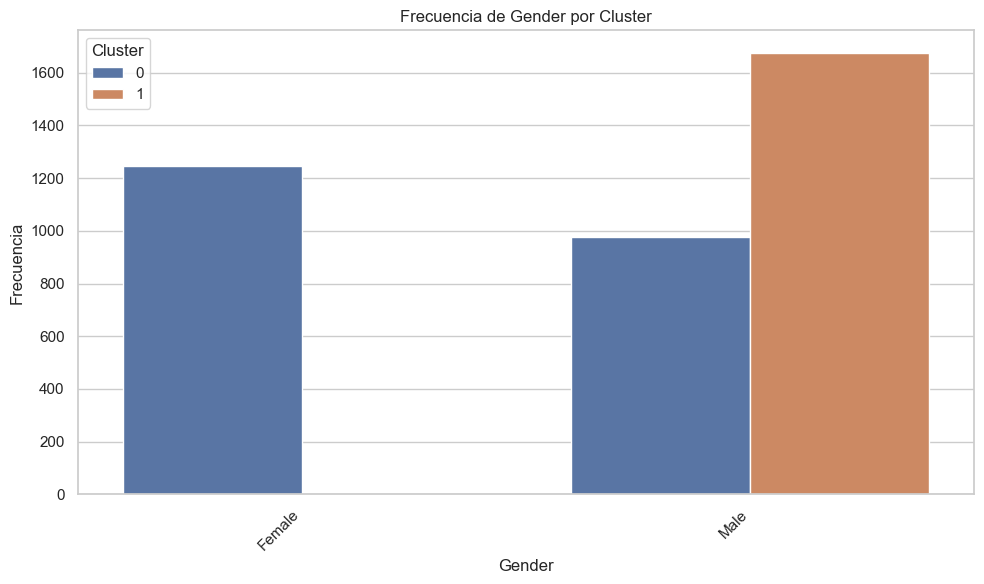

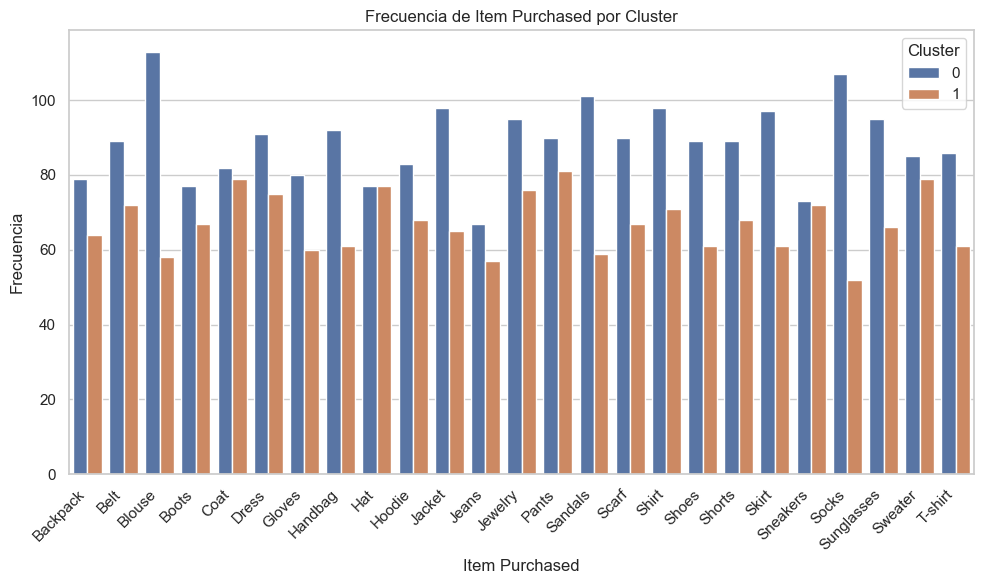

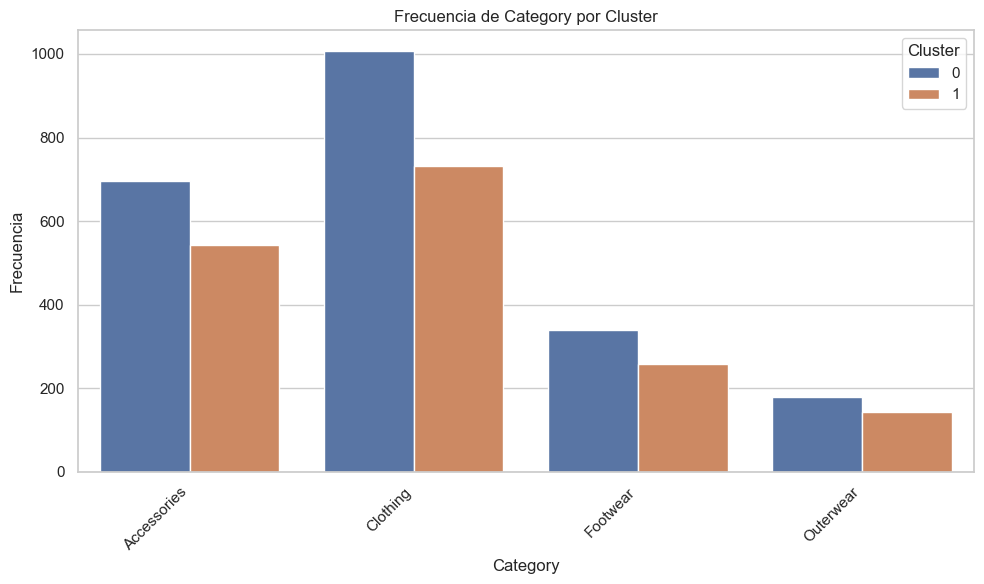

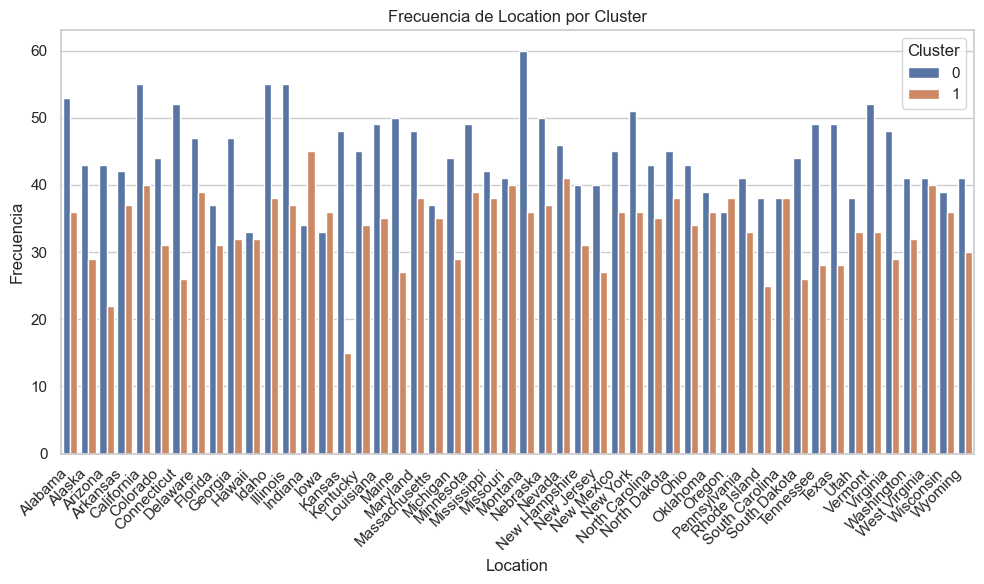

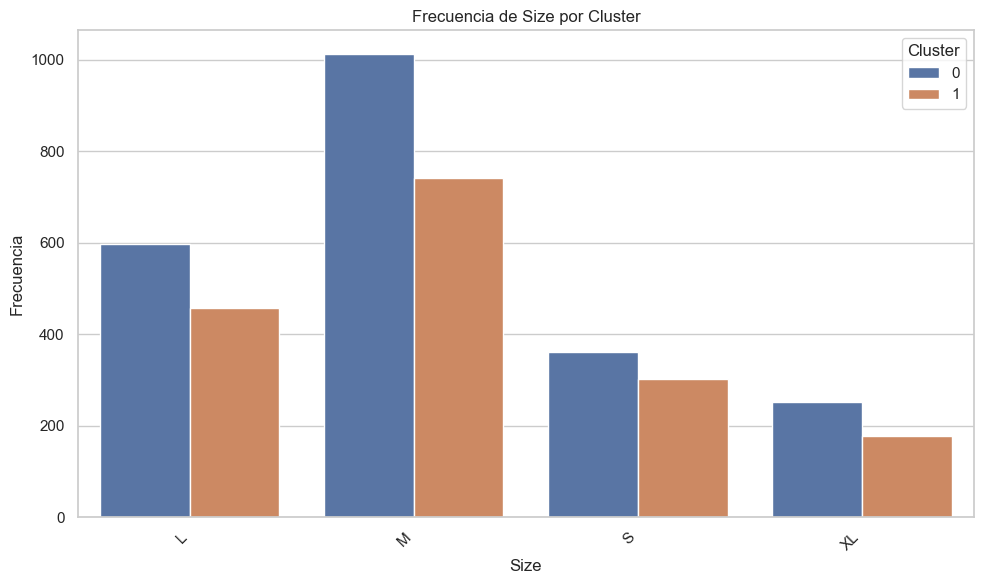

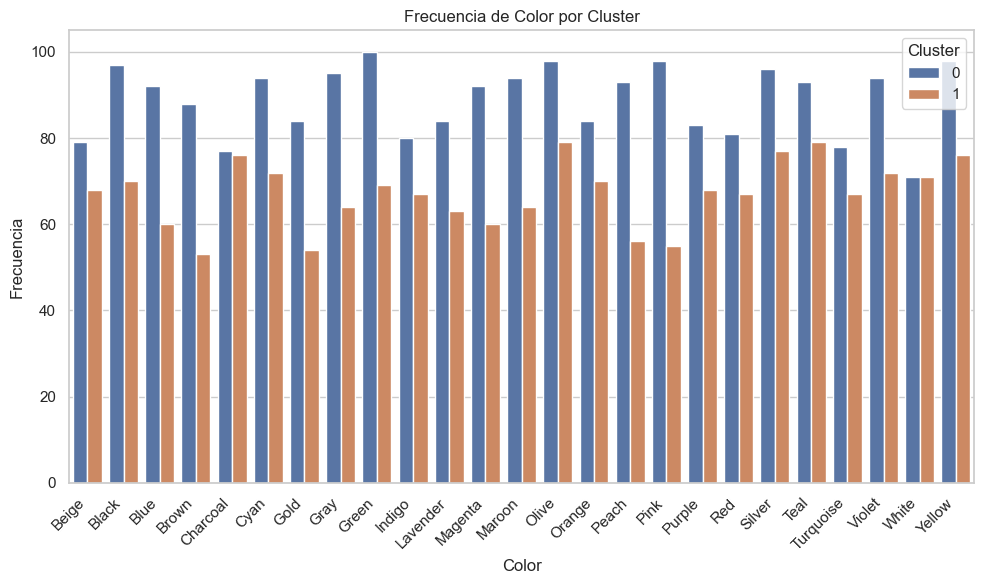

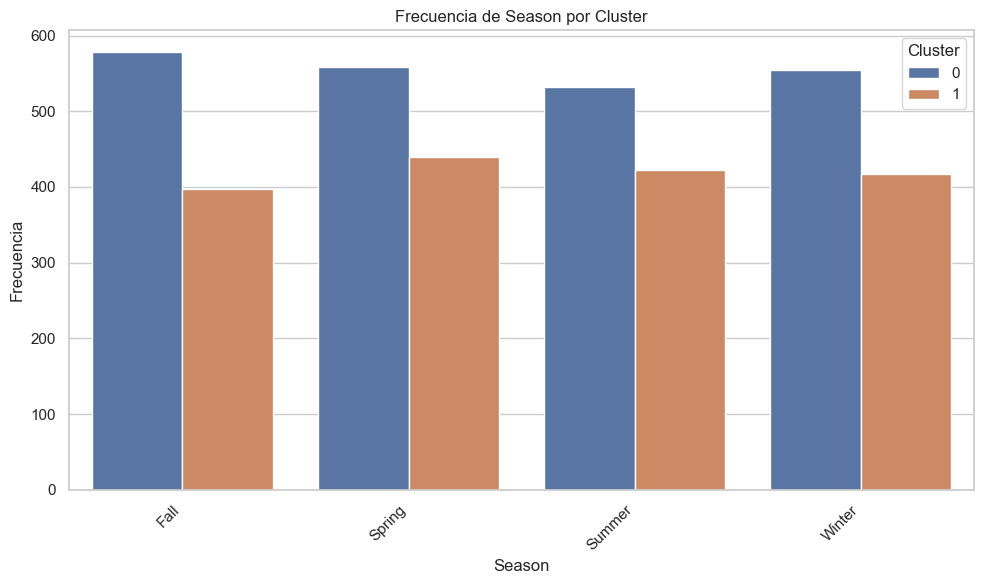

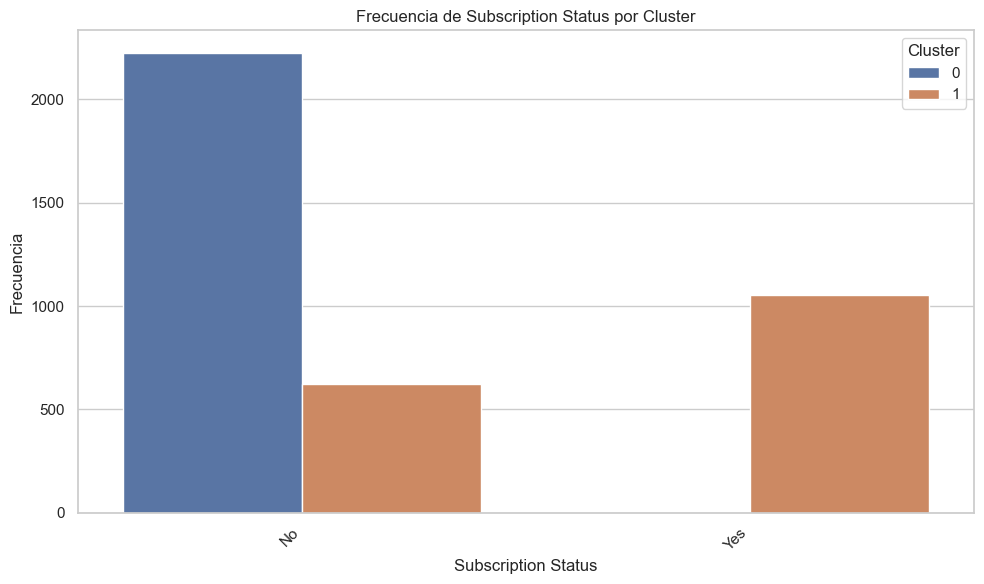

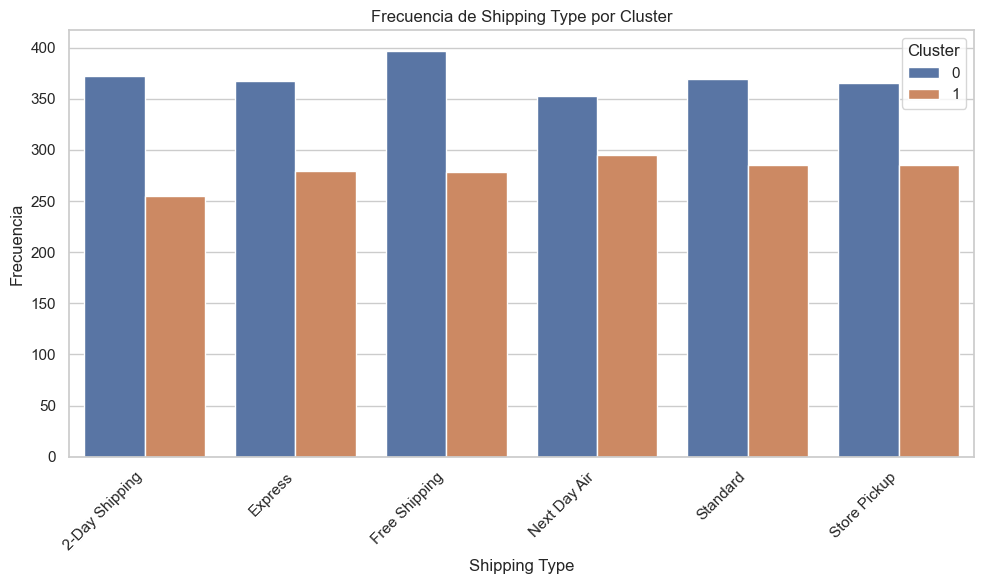

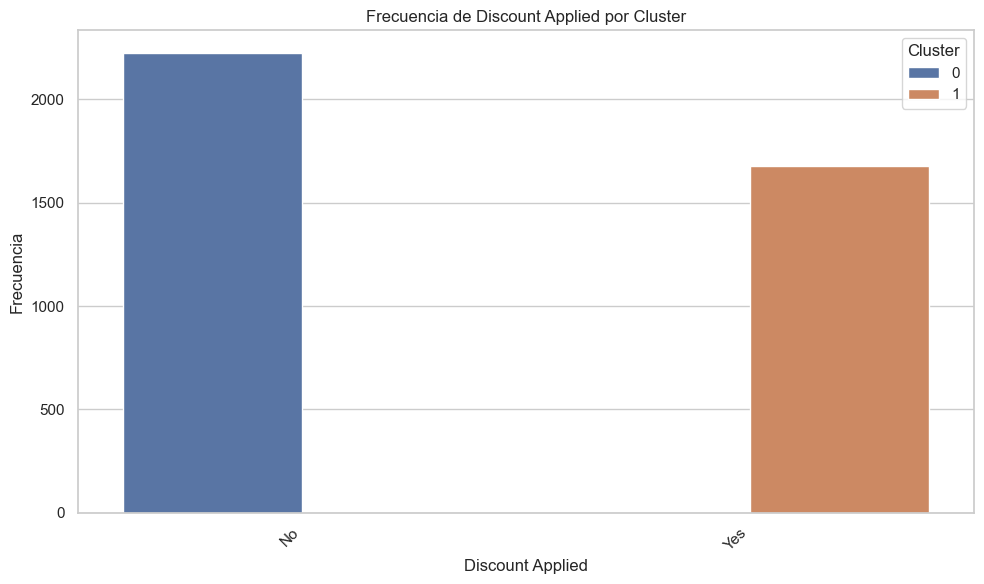

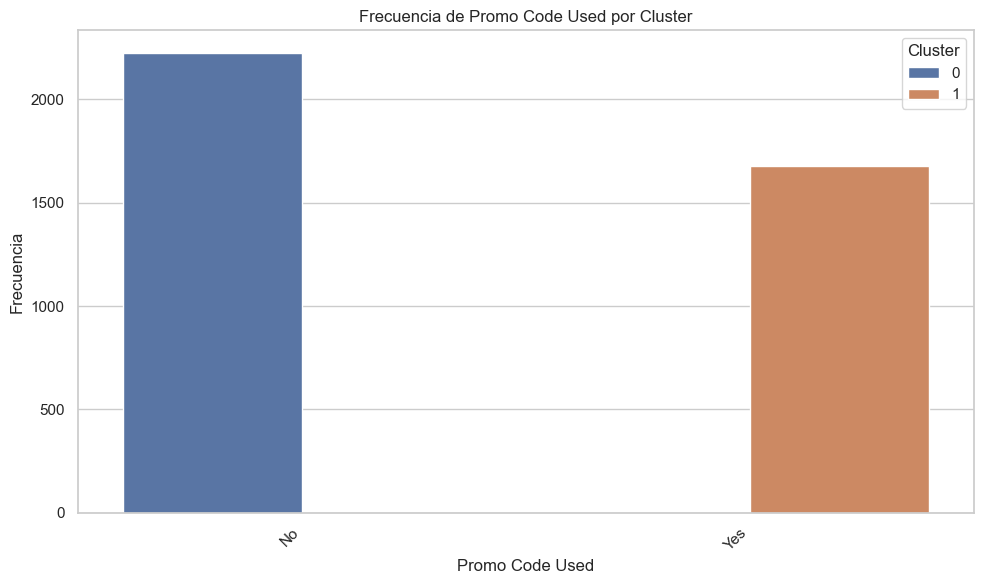

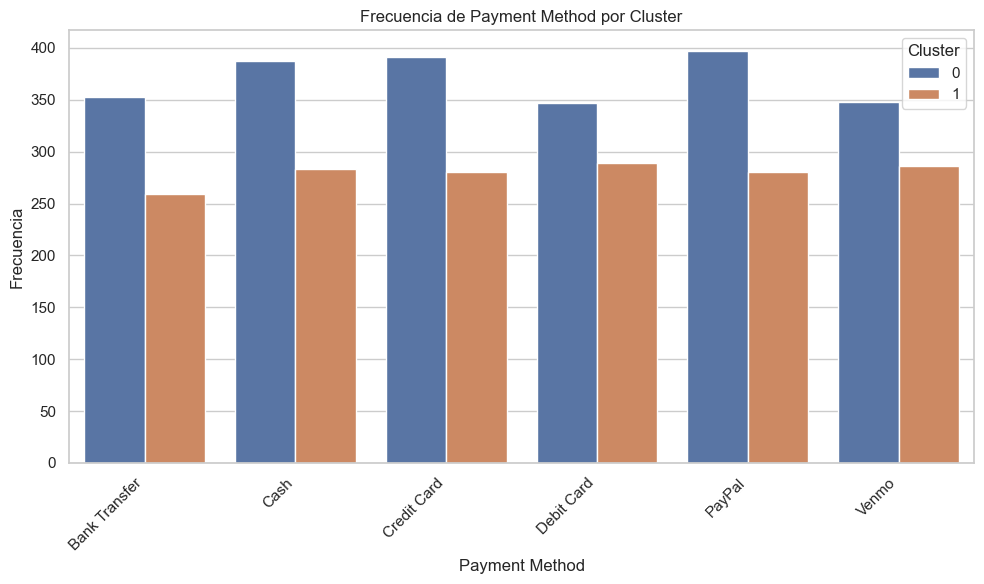

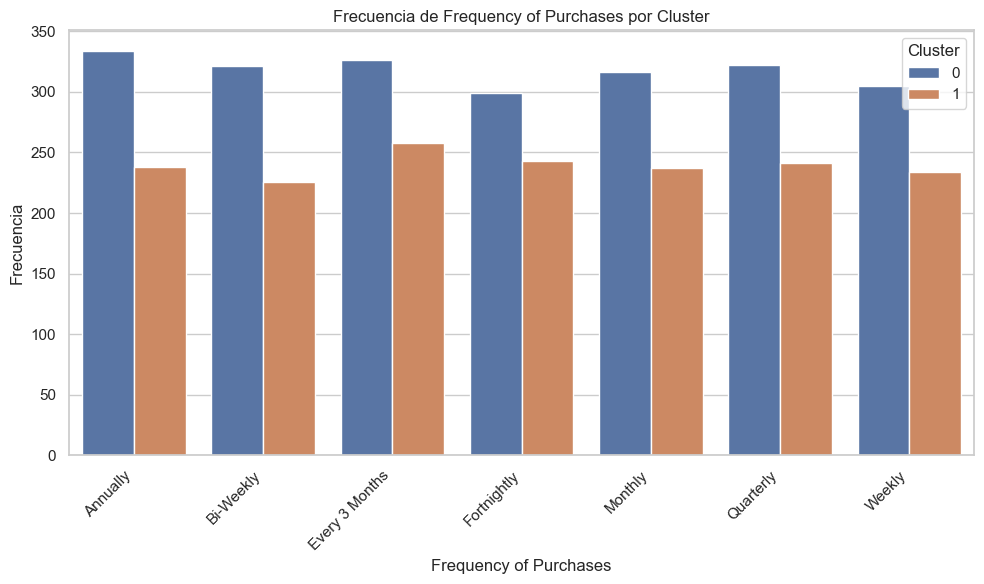

In [41]:
import seaborn as sns

for columna in columnas_categoricas:
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico como desees
    
    # Agrupar por cluster y contar las frecuencias
    frecuencias_por_cluster = data.groupby(['Cluster', columna]).size().reset_index(name='count')
    
    # Utilizar seaborn para trazar barras con colores según el cluster
    sns.barplot(x=columna, y='count', hue='Cluster', data=frecuencias_por_cluster)
    
    plt.title(f'Frecuencia de {columna} por Cluster')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha="right")  # Rota los nombres de las categorías para mejor lectura
    plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para que el subplot se ajuste al área del gráfico
    plt.legend(title='Cluster')  # Agrega leyenda
    plt.show()



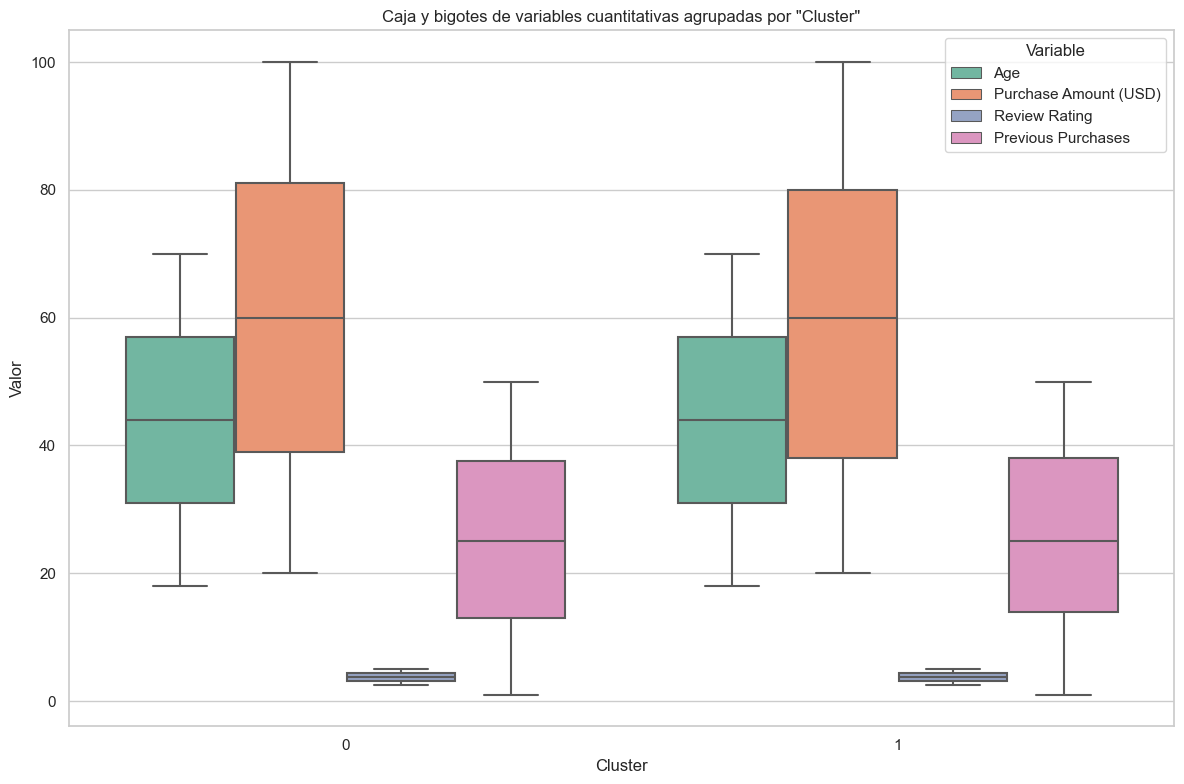

In [54]:
# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Reorganizar el DataFrame utilizando melt para tener una sola columna para las variables cuantitativas
melted_data = pd.melt(data, id_vars=['Cluster'], value_vars=columnas_cuantitativas, var_name='Variable', value_name='Valor')

# Crear un gráfico de cajas y bigotes para todas las variables cuantitativas agrupadas por "Cluster"
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_data, x="Cluster", y="Valor", hue="Variable", palette="Set2")
plt.title('Caja y bigotes de variables cuantitativas agrupadas por "Cluster"')
plt.xlabel('Cluster')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

